In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# 0 = Baseline
# 1 = Easy
# 2 = Medium
# 3 = Hard
# 4 = Extreme

In [12]:
def process_and_average(arr, wave, placement="f"):
    wave = wave.title()
    temp1 = None
    temp2 = None
    if placement.lower() == "f":
        temp1 = arr[wave+"_AF7"]
        temp2 = arr[wave+"_AF8"]
    elif placement.lower() == "b":
        temp1 = arr[wave+"_TP9"]
        temp2 = arr[wave+"_TP10"]
    else:
        raise Exception('Invalid Electrode Placement')
    temp1.dropna(axis = 0, inplace=True)
    temp2.dropna(axis = 0, inplace=True)
    avg = ( temp1 + temp2 ) / 2
    avg = 10**avg
    return avg.to_numpy()

In [4]:
def get_wave(wave, placement, baseline, easy, medium, hard, extreme):
    data    = []
    base_   = [process_and_average(data, wave, placement) for data in baseline]
    easy_   = [process_and_average(data, wave, placement) for data in easy]
    med_    = [process_and_average(data, wave, placement) for data in medium]
    hard_   = [process_and_average(data, wave, placement) for data in hard]
    ext_    = [process_and_average(data, wave, placement) for data in extreme]

    data.append(base_)
    data.append(easy_)
    data.append(med_)
    data.append(hard_)
    data.append(ext_)

    return data
    # Returns (base, easy, med, hard, ext)

In [5]:
baseline = []
easy = []
medium = []
hard = []
extreme = []

for i in range(1,3):
    baseline.append(pd.read_csv('Control/'+str(i)+'.csv'))
    easy.append(pd.read_csv('Easy/'+str(i)+'.csv'))
    medium.append(pd.read_csv('Medium/'+str(i)+'.csv'))
    hard.append(pd.read_csv('Hard/'+str(i)+'.csv'))
    extreme.append(pd.read_csv('Extreme/'+str(i)+'.csv'))

## Front Electrode Box Plots

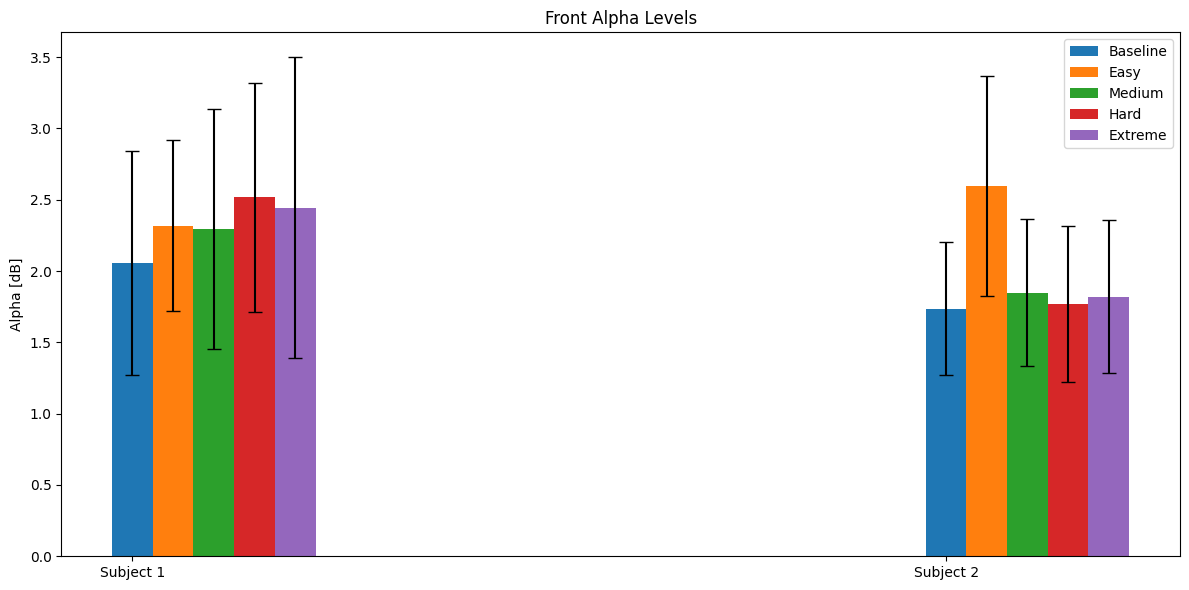

In [6]:
def plot_wave(wave, placement, baseline, easy, medium, hard, extreme):
    data = get_wave(wave, placement, baseline, easy, medium, hard, extreme)
    mean_base = [i.mean() for i in data[0]]
    mean_easy = [i.mean() for i in data[1]]
    mean_med  = [i.mean() for i in data[2]]
    mean_hard = [i.mean() for i in data[3]]
    mean_ext  = [i.mean() for i in data[4]]

    std_base = [i.std() for i in data[0]]
    std_easy = [i.std() for i in data[1]]
    std_med  = [i.std() for i in data[2]]
    std_hard = [i.std() for i in data[3]]
    std_ext  = [i.std() for i in data[4]]

    labels = [f'Subject {i+1}' for i in range(len(baseline))]
    x = np.arange(len(labels))
    width = 0.05

    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar(x,          mean_base, width, yerr=std_base, label = "Baseline", capsize = 5)
    rects2 = ax.bar(x+ width,   mean_easy, width, yerr=std_easy, label = "Easy", capsize = 5)
    rects3 = ax.bar(x+ 2*width, mean_med, width, yerr=std_med, label = "Medium", capsize = 5)
    rects4 = ax.bar(x+ 3*width, mean_hard, width, yerr=std_hard, label = "Hard", capsize = 5)
    rects5 = ax.bar(x+ 4*width, mean_ext, width, yerr=std_ext, label = "Extreme", capsize = 5)

    electrode_placement = ""
    if placement.lower() == "f":
        electrode_placement = "Front"
    else:
        electrode_placement = "Back"

    ax.set_ylabel(wave + " [dB]")
    ax.set_title(electrode_placement + " " + wave + " Levels")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

plot_wave("Alpha", "f", baseline, easy, medium, hard, extreme)

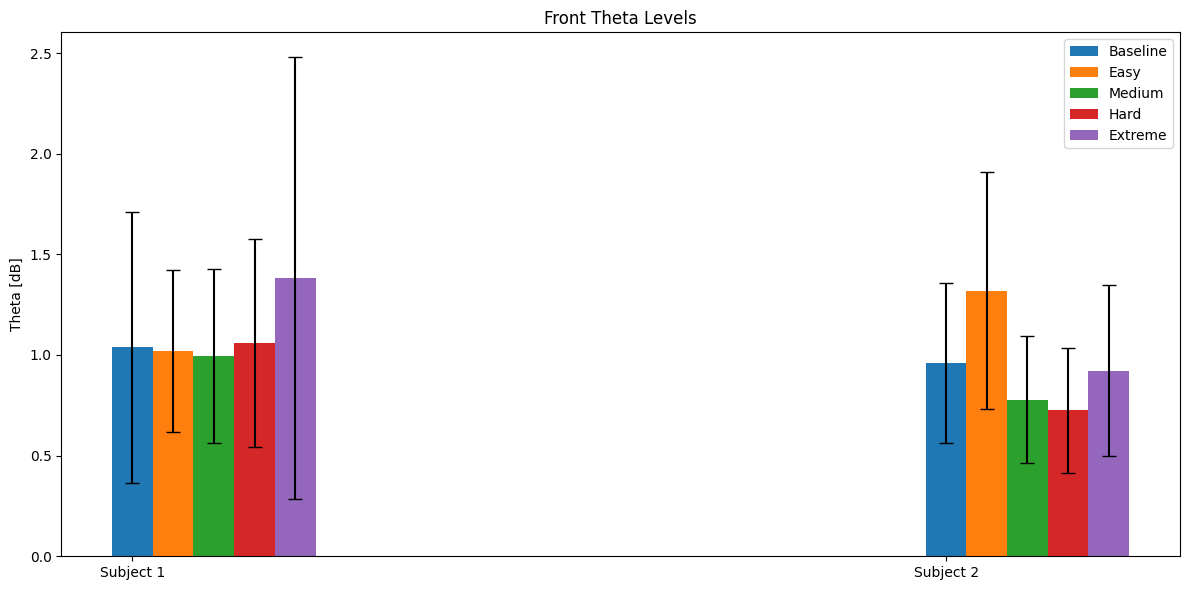

In [7]:
plot_wave("Theta", "f", baseline, easy, medium, hard, extreme)

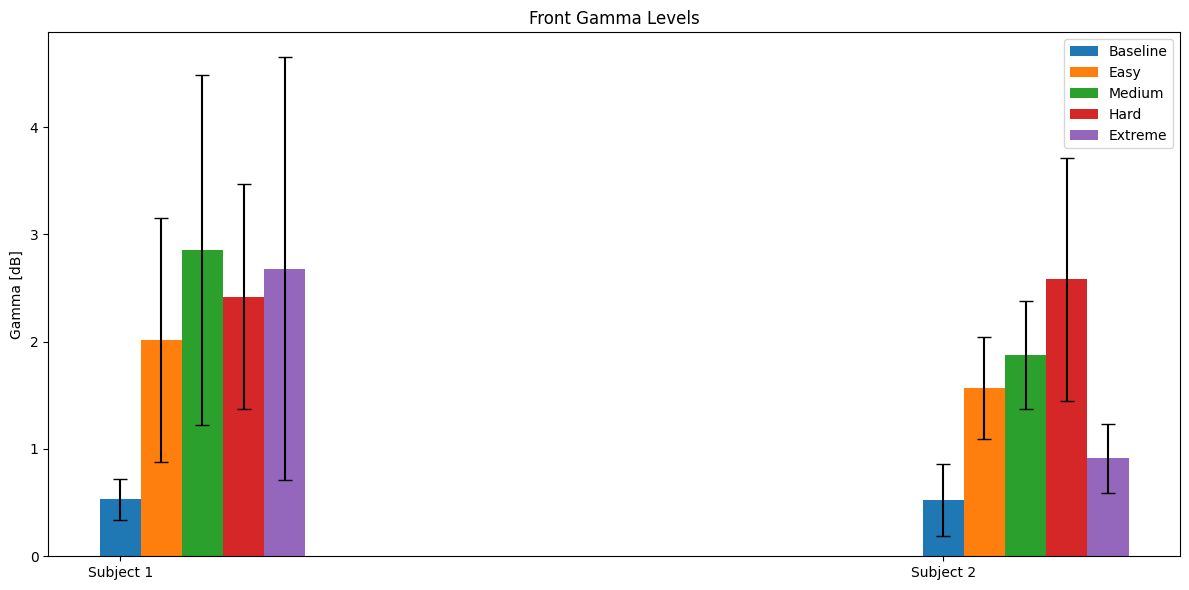

In [8]:
plot_wave("Gamma", "f", baseline, easy, medium, hard, extreme)

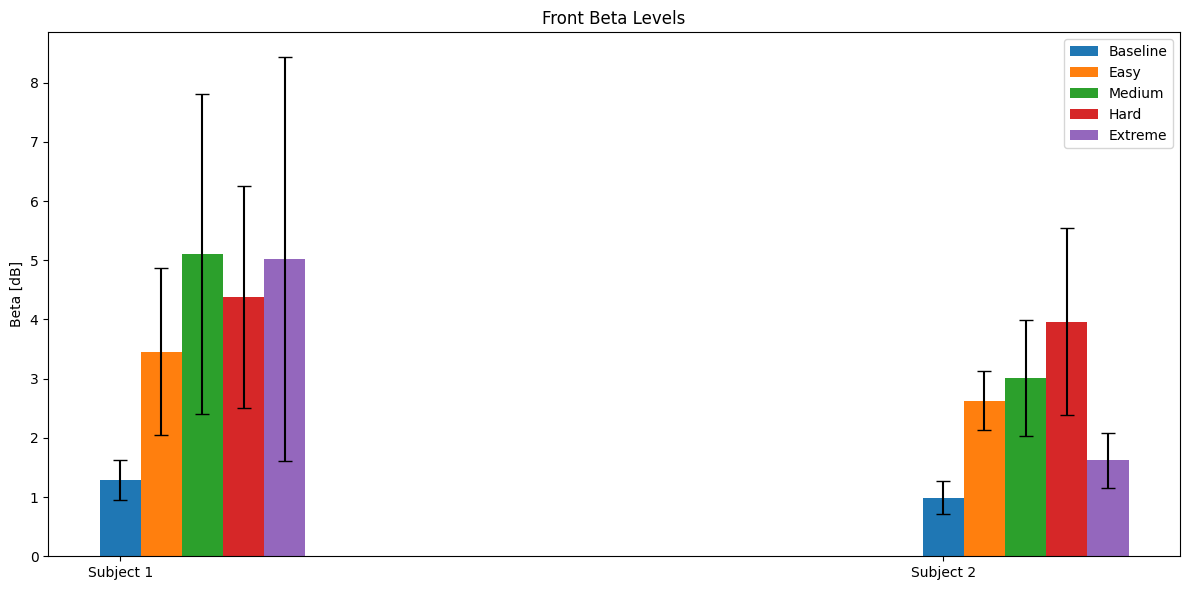

In [10]:
plot_wave("Beta", "f", baseline, easy, medium, hard, extreme)

## Back Electrode Box Plots

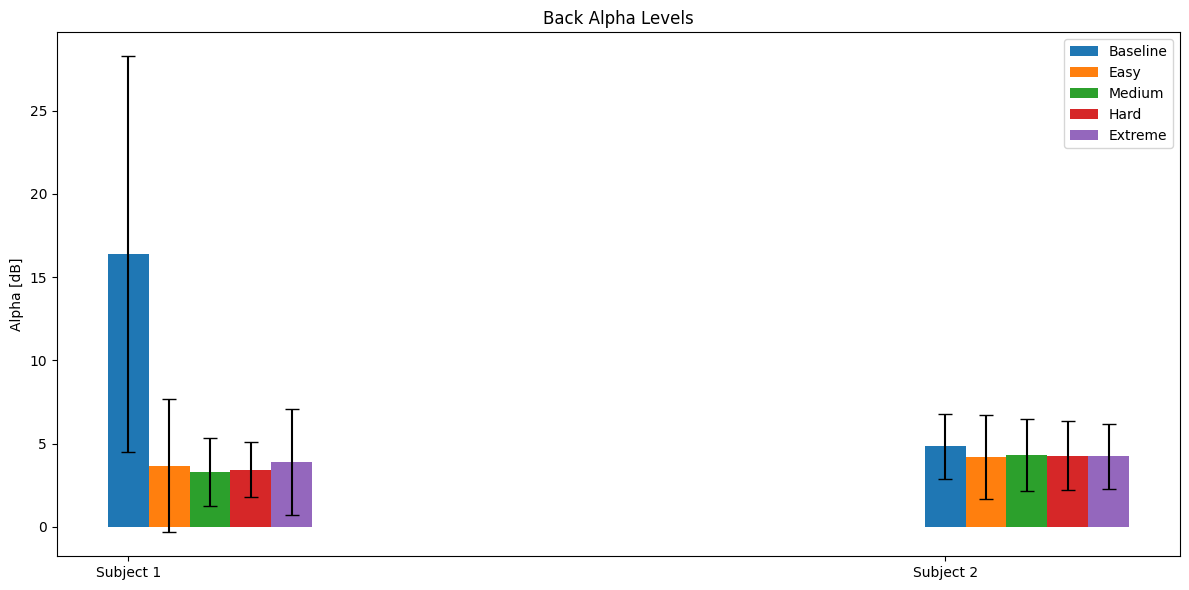

In [13]:
plot_wave("Alpha", "b", baseline, easy, medium, hard, extreme)

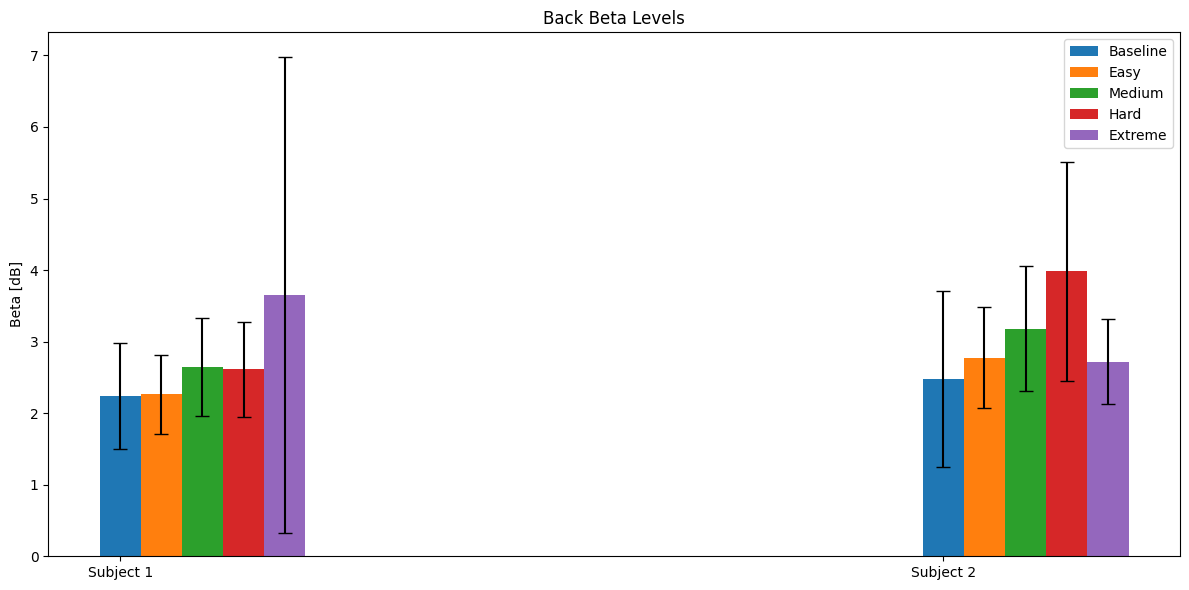

In [14]:
plot_wave("Beta", "b", baseline, easy, medium, hard, extreme)

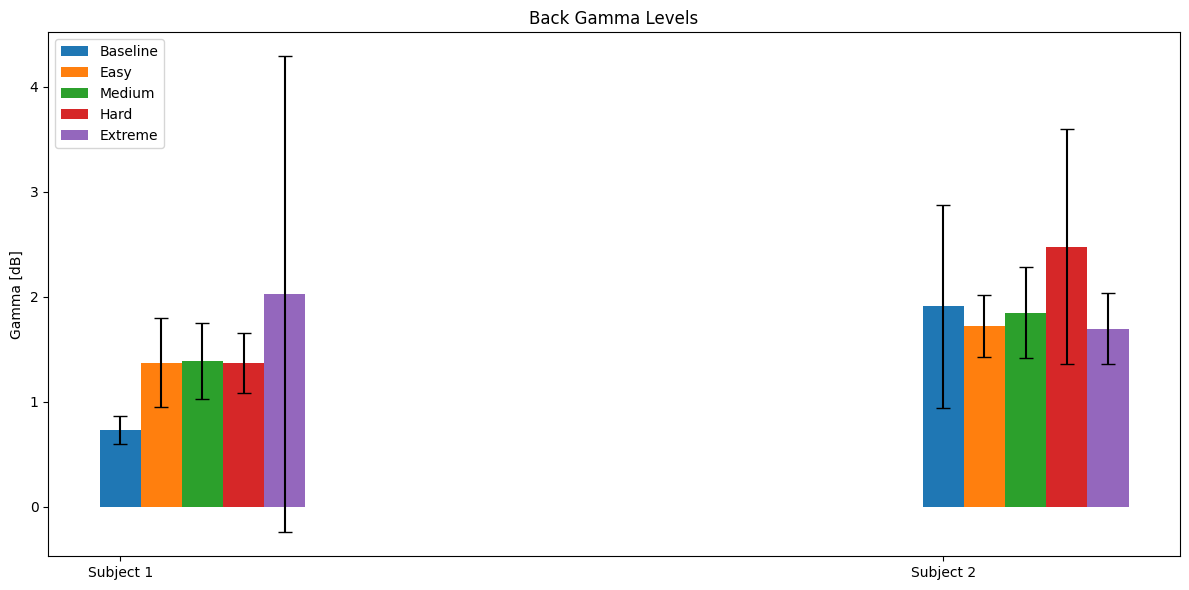

In [16]:
plot_wave("Gamma", "b", baseline, easy, medium, hard, extreme)

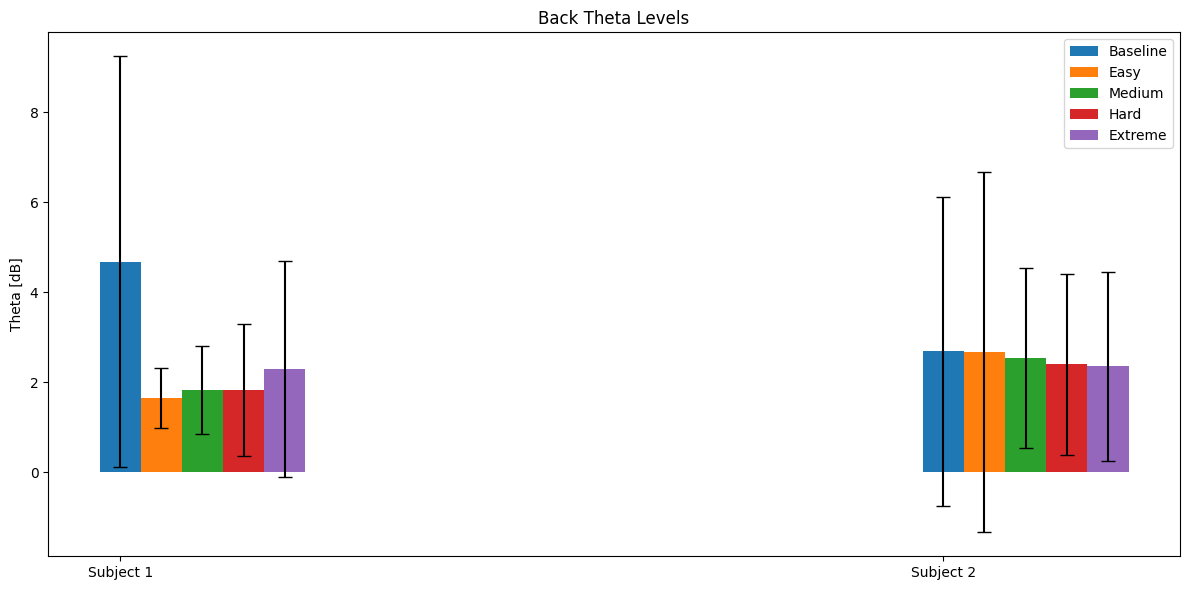

In [17]:
plot_wave("Theta", "b", baseline, easy, medium, hard, extreme)

## Engagement Box Plot

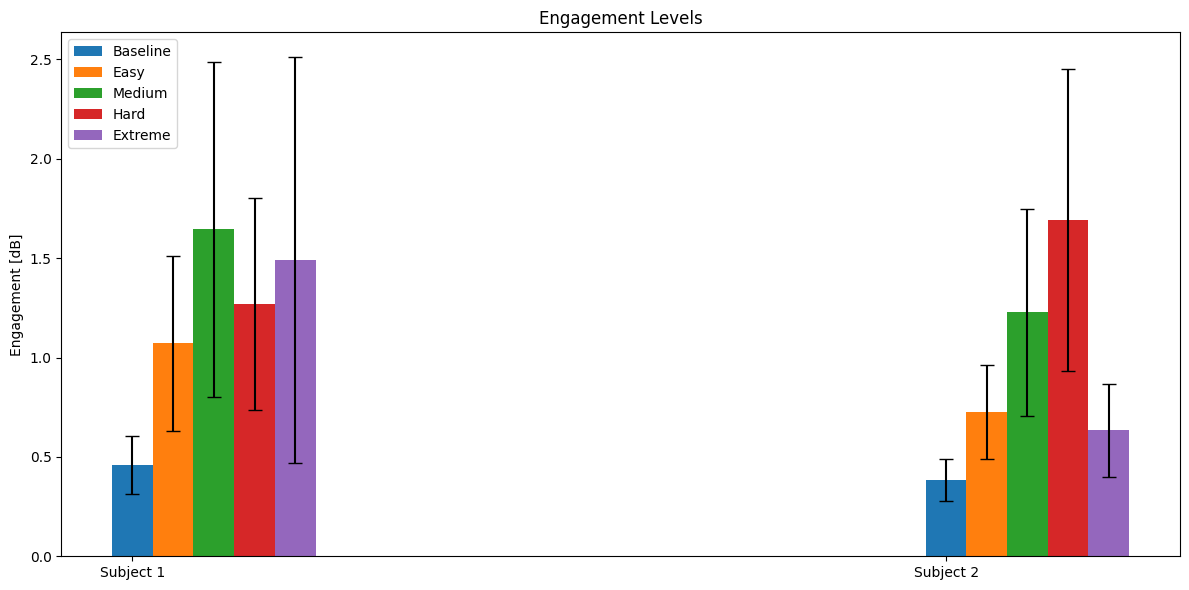

In [30]:
def plot_engagement(baseline, easy, medium, hard, extreme):
    # Beta / (Alpha + Theta)
    alpha_ = get_wave("Alpha", "f", baseline, easy, medium, hard, extreme)
    beta_ = get_wave("Beta", "f", baseline, easy, medium, hard, extreme)
    theta_ = get_wave("Theta", "f", baseline, easy, medium, hard, extreme)

    engagement = []
    
    for i in range(0, 5):
        engagement_ = []
        for j in range(len(baseline)):
            engagement_.append(beta_[i][j] / (alpha_[i][j] + theta_[i][j]))

        engagement.append(engagement_)

    mean_base = [i.mean() for i in engagement[0]]
    mean_easy = [i.mean() for i in engagement[1]]
    mean_med  = [i.mean() for i in engagement[2]]
    mean_hard = [i.mean() for i in engagement[3]]
    mean_ext  = [i.mean() for i in engagement[4]]

    std_base = [i.std() for i in engagement[0]]
    std_easy = [i.std() for i in engagement[1]]
    std_med  = [i.std() for i in engagement[2]]
    std_hard = [i.std() for i in engagement[3]]
    std_ext  = [i.std() for i in engagement[4]]

    labels = [f'Subject {i+1}' for i in range(len(baseline))]
    x = np.arange(len(labels))
    width = 0.05

    fig, ax = plt.subplots(figsize=(12,6))
    rects1 = ax.bar(x,          mean_base, width, yerr=std_base, label = "Baseline", capsize = 5)
    rects2 = ax.bar(x+ width,   mean_easy, width, yerr=std_easy, label = "Easy", capsize = 5)
    rects3 = ax.bar(x+ 2*width, mean_med, width, yerr=std_med, label = "Medium", capsize = 5)
    rects4 = ax.bar(x+ 3*width, mean_hard, width, yerr=std_hard, label = "Hard", capsize = 5)
    rects5 = ax.bar(x+ 4*width, mean_ext, width, yerr=std_ext, label = "Extreme", capsize = 5)

    ax.set_ylabel("Engagement [dB]")
    ax.set_title("Engagement Levels")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()
    
plot_engagement(baseline, easy, medium, hard, extreme)